# Business understanding
The main reason to do this is basically to avoid that cool new way to work that someone might be trying to fall short by one single person, or maybe that new developer that was hired and can be full of questions regarding paychecks or vacation. Business questions will be:

### Do anyone need a HR intervention?
For that, we build the dataset and run the functions to check how strong the connections are between people. The result for the Hive IT team is shown below.
### Who are the most proactively communicative people?
By using the colored edges option, we can clearly see what are the dominant colors between nodes, and if they are of the same color, it means that the communication mainly comes from that node.
### Is the tem reproducing the overall company behavior?
Plot the chart for another team and compare it.


# Import packages and declare functions

At this part, main goal is to declare the functions that are going to be used at the main code.

In [3]:
# import necessary packages

# data analysis
import pandas as pd 
import numpy as np

# pseudo random generator
import random

# plotters
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

# Data understanding
Data is collected in a way that is not the permitted Networkx input. In order to reach that, we melt the matrix. Also, to identify edges belonging to nodes, we can add random colors.

## Add random colors
Following function aims to add random colors to the dataframe, this way we can identify the nodes at the picture.

In [4]:
def addColors(df):
    """Add random colors to the DataFrame to identify nodes

    Parameters:
    df (Pandas DataFrame): Data Frame that will receive the colors

    Returns:
    df_color (Pandas DataFrame): Data Frame with random colors in hex

   """
    # attribute colors to each primary key (name)
    df_color = df.copy()
    df_color['color'] = np.random.randint(0,0xFFFFFF, size=len(df_color))
    df_color['color'] = df_color['color'].apply(lambda x: str(hex(x))[2:]).astype(str)

    return df_color


## Melt the matrix
In order to use the networkx package, we need to adapt the matrix in order to meet the input requirements.

In [5]:
def meltMatrix(df):
    """Adjusts the matrix so it can fit the networkx format.

    Quick notice: the missing values represent people that hasn't responded to 
    the survey. The other ones mean people that self-evaluated communication, 
    so it won't be a problem to drop these NaN's.

    Parameters:
    df (Pandas DataFrame): Data Frame that will be melted

    Returns:
    df_melt (Pandas DataFrame): Melted Data Frame

   """
    # melts the dataframe and removes empty data
    df_melt = df.copy()
    df_melt = df_melt.melt(id_vars=['Nome','color'],value_vars=df_melt.columns)
    df_melt.columns = ['nome1','color','nome2','relacao']
    df_melt.dropna(inplace=True, how='all',axis=1)
    df_melt.dropna(inplace=True)
    df_melt.reset_index(inplace=True)
    df_melt.drop(['index'],axis=1,inplace=True)

    return df_melt

## Plot the actual network
Finally, the following function plots the networks at the screen and saves the files.

In [6]:
def plotNetwork(df, colored_edges=False, out_name='network_output'):
    """Plots the networkx network and outputs it as a high resolution PNG

    Parameters:
    df (Pandas DataFrame): Data Frame that will be evaluated. Has to be in Person1 | Person2 | Level of Connection | Color, format
    colored_edges (bool): whether or not the edges will be colored. Default: False
    out_name (string): name of the output PNG file

    Returns:
    Nothing

    """

    # copies the dataframe to avoid memory overlap
    df_plot = df.copy()

    # substitutes low level connections so distant nodes will show up
    df_plot = df_plot[df_plot['relacao']>0.5]

    # instatiates a graph
    net = nx.Graph()

    # define variables
    source = df_plot['nome1']
    destination = df_plot['nome2']
    weights = df_plot['relacao']
    colors = df_plot['color'] # colors in hex
    colors_rgb = [list(np.random.choice(range(256), size=3)/255) for i in range(len(source.unique()))] # convert colors to rgb

    # decide on parameter based on user's choice
    if colored_edges==False:
        final_color_edges = 'grey'
        final_color_names = 'black'
    else:
        final_color_names = colors_rgb
        final_color_edges = colors_rgb

    for e in zip(source,destination,weights,colors):
        # defines elements in loop
        src = e[0]
        dst = e[1]
        rel = e[2]
        color = e[3]
        
        # add nodes
        net.add_node(src)

        # add edges
        net.add_edge(src,dst)
        
    # removes last names and surnames
    translation = dict(zip(df_plot['nome1'].unique(),[item.split(' ')[0] for item in df_plot['nome1'].unique()]))

    # declares a figure
    fig, ax = plt.subplots(figsize=(15,15))

    # creates a layout based on gravitation
    positions = nx.spring_layout(net, k=1, seed=42)

    # draws the edges
    nx.draw_networkx_edges(net,
                        positions,
                        alpha=0.3,
                        edge_color=final_color_edges,
                        width=weights*1.1)
    # node_size is declared locally because for some reason when I put a variable, it changed it size to 0. Could not fix that
    nx.draw_networkx_nodes(net,positions,
                        alpha=0,
                        node_size=(df.groupby('nome1').sum()['relacao']**2).loc[list(net.nodes())])

    # draws the names and scales their sizes according to scores
    from matplotlib.pyplot import text
    for idx,(node, (x, y)) in enumerate(positions.items()):
        text(x, y, translation[node], fontsize=net.degree[node]*0.8, ha='center', va='center',color=final_color_names if colored_edges==False else final_color_names[idx])

     
    # figure details
    plt.axis('off')
    plt.savefig(out_name + '.png', dpi=300)

# Data Preparation

At this part, we collect the data and organize using the above functions.

In [7]:
# wrangle for the hive team

# gather and clean
df_hive = pd.read_excel('conexoes_hive.xlsx')
df_hive = addColors(df_hive)
df_hive = meltMatrix(df_hive)

# assess
df_hive.head()

,nome1,color,nome2,relacao
0,Alexandre Matheus Gomes,c1f2d9,Agatha Milena Castro,0.5
1,Antônia Lorena Raimunda Araújo,6741a6,Agatha Milena Castro,0.5
2,Arthur Benício Duarte,c12664,Agatha Milena Castro,0.5
3,Ayla Sophia Nunes,bdb96c,Agatha Milena Castro,0.5
4,Breno Tiago Pinto,944573,Agatha Milena Castro,0.5


In [8]:
# wrangle for the corujas team 

# gather and clean
df_corujas = pd.read_excel('conexoes_corujas.xlsx')
df_corujas = addColors(df_corujas)
df_corujas = meltMatrix(df_corujas)

# assess
df_corujas.head()

,nome1,color,nome2,relacao
0,Andrea Valentina Heloisa Pinto,addf68,Allana Eloá Rodrigues,1.0
1,Bernardo Tomás Pietro Porto,cfcf41,Allana Eloá Rodrigues,2.0
2,Brenda Josefa Ramos,e036e4,Allana Eloá Rodrigues,2.0
3,Bryan Breno da Costa,932bf7,Allana Eloá Rodrigues,2.0
4,Bryan Luan Peixoto,643b80,Allana Eloá Rodrigues,1.0


# Data modeling and evaluation

Using spring layouts, we plot the nodes and their connections. <br><br>

First, the single-colored, unidirectional networks need to be plotted.

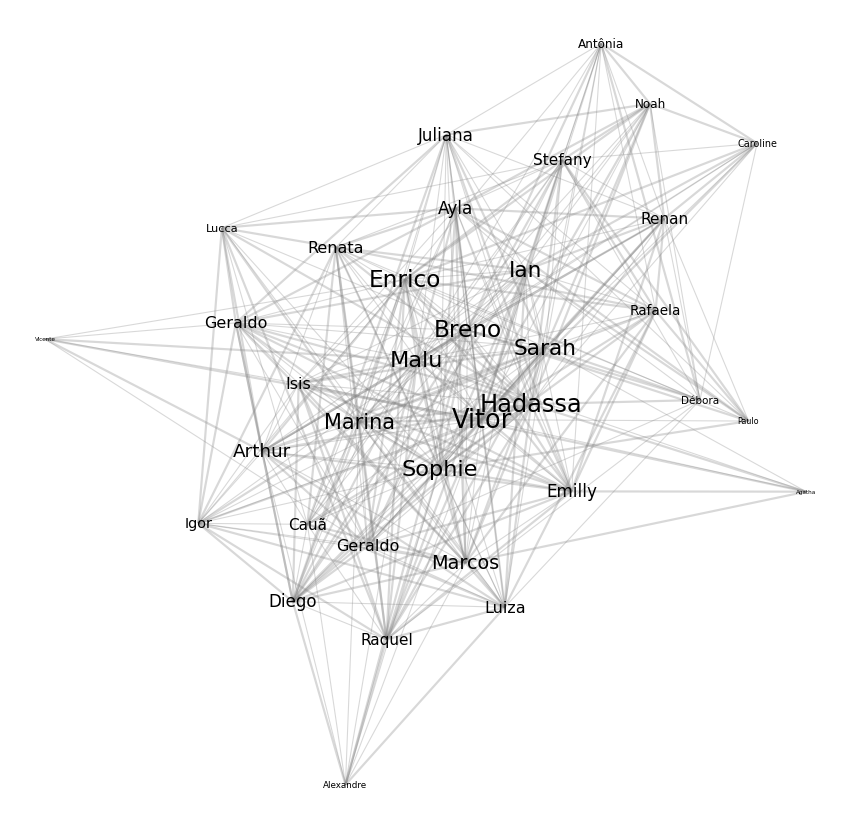

In [9]:
# for the hive team
plotNetwork(df_hive,out_name='hive_single_color')

### Do anyone need a HR intervention?

It is easy to see that Vicente and Agatha are far away from the main communication nodes, and the reason for that can be inferred through real life investigation and other data crossing. Vicente is a new team member, so it is natural, specially considering remote teamwork, that he might be still onboarding. However, Agatha is a videomaker that works by demand. The reactive format might be an indicator that a feedback can be provided for she to be closer to the team.

<br><br>
And now, using colors, which might indicate the communication direction and dominance.

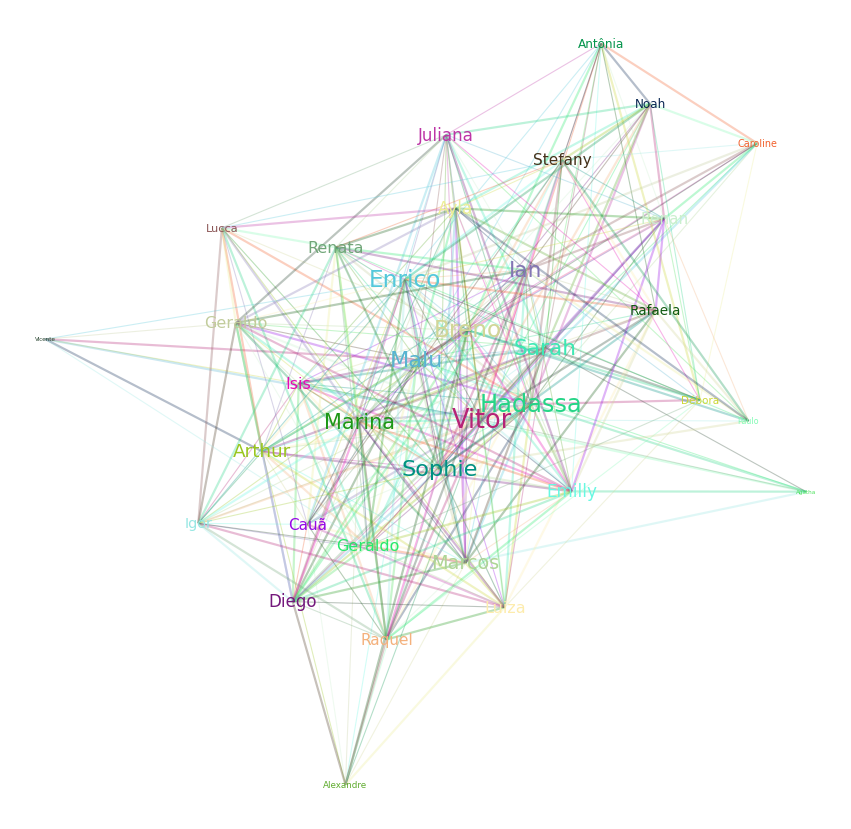

In [10]:
plotNetwork(df_hive,colored_edges=True,out_name='hive_colored')

### Who are the most proactively communicative people?

Enrico, the design leader, is on purple, and we can see some sort of dominance of the purple color around him. That means that he is being proactive to find people. The same can be said about Vitor, the techmanager. <br> <br>
Breno, the group product manager, is acting in a reactive manner, because, even with his color being a dark, grayer green, the main colors around his node are diverse. That means people look for him often, instead of the other way around.

### Is the tem reproducing the overall company behavior?

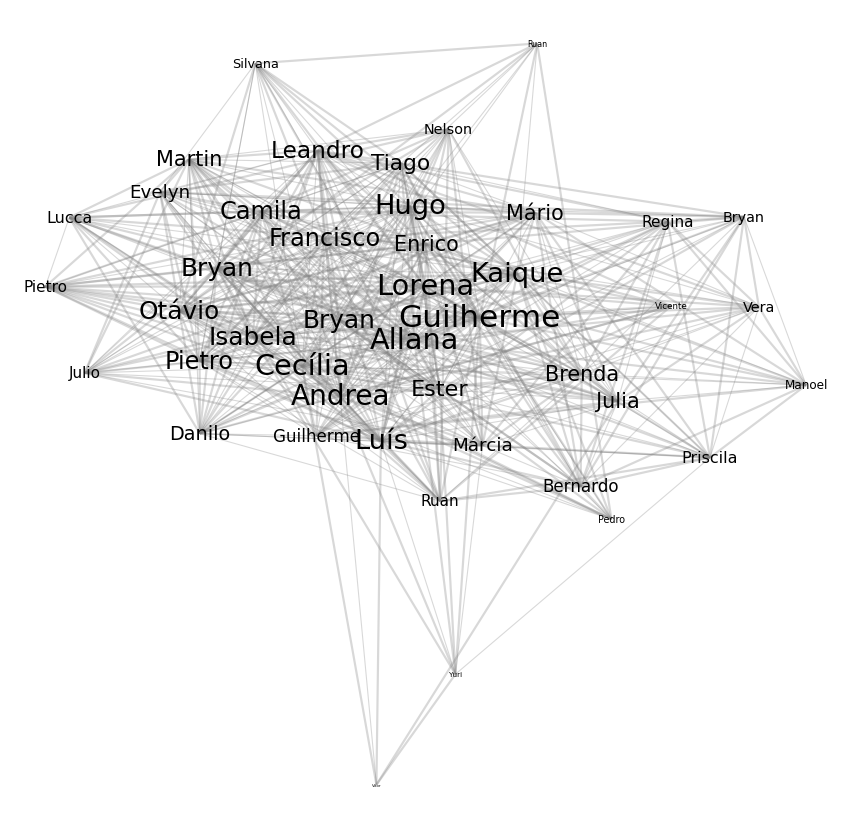

In [11]:
# and for the corujas team
plotNetwork(df_corujas,out_name='corujas_single_color')

We can clearly see that Vitor, Yari and Ruan are a little bit isolated, which suggests that they could be a little bit closer to the teams. Neither of them is onboarding. However, we can see that the overall team communication performance is a little bit closer between everyone in general.

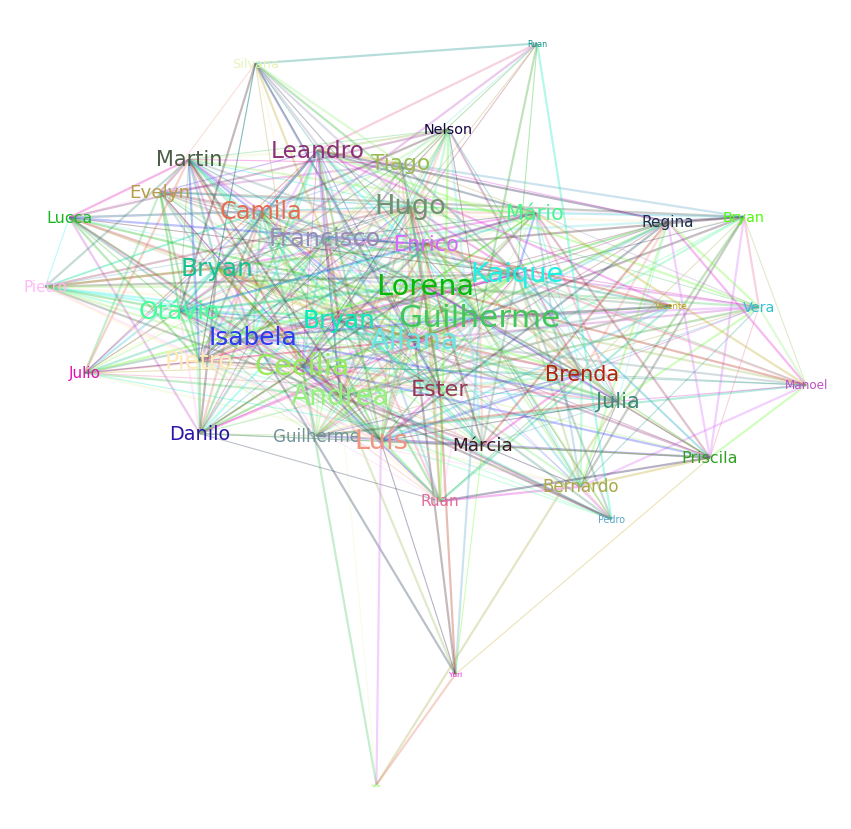

In [12]:
plotNetwork(df_corujas,colored_edges=True,out_name='corujas_colored')

It is harder to see color dominance at this graph, what can be a good thing, in what concerns team fragility. Guilherme, the tech manager, is more reactively communicating, and that might indicate that the team is a little bit more autonomous. Overall, this seems a little bit more communicative than the Hive team.

# Evaluation
As expected, we can clearly see the nodes that are apart, and which ones are more proactively communicating.

# Deployment
Deployment techniques are not applicable here, because all the data processing is done at this notebook.